# Import The Important Module

In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image
from keras.layers import GaussianNoise
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.layers import BatchNormalization
from keras.models import Sequential
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
print('setup complete!')

setup complete!


# Checking Directory

In [2]:
os.listdir('../input/rockpaperscissors')

['paper', 'rock', 'rps-cv-images', 'README_rpc-cv-images.txt', 'scissors']

In [3]:
os.listdir('../input/rockpaperscissors/rps-cv-images')

['paper', 'rock', 'README_rpc-cv-images.txt', 'scissors']

# Splitting The Data

In [4]:
dirBase = '../input/rockpaperscissors/rps-cv-images'
dirTrain = os.path.join(dirBase, 'train')
dirVal = os.path.join(dirBase, 'val')

# Data Processing with Image Augmentation

In [5]:
datagenTrain = ImageDataGenerator(rescale=(1./255),
                             horizontal_flip=True,
                             vertical_flip=True,
                             validation_split=0.4,
                             rotation_range=25,
                             zoom_range=0.2,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             shear_range=0.2,
                             fill_mode="wrap")

# Splitting TrainGen and ValGen

In [6]:
trainGen = datagenTrain.flow_from_directory(dirBase,
                                            target_size=(100, 150),
                                            shuffle=True,
                                            color_mode='rgb',
                                            class_mode='categorical',
                                            interpolation='nearest',
                                            batch_size=32,
                                            subset='training')

valGen = datagenTrain.flow_from_directory(dirBase,
                                          target_size=(100, 150),
                                          shuffle=True,
                                          color_mode='rgb',
                                          class_mode='categorical',
                                          interpolation='nearest',
                                          batch_size=32,
                                          subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


# Making an CNN Architecture

In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 150, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(256, (2, 2), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 148, 32)       896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 16, 256)        1

# Callbacks

In [8]:
LRR = ReduceLROnPlateau(monitor='val_acc',
                        patience=2,
                        verbose=1,
                        factor=0.5,
                        min_lr=0.000003)

# Compiler

In [9]:
model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(), metrics=['accuracy'])

# Training Data

In [10]:
hist = model.fit(
    trainGen,
    steps_per_epoch=25,
    epochs=20,
    validation_data=valGen,
    validation_steps=5,
    verbose=2,
    callbacks=[LRR])

Epoch 1/20
25/25 - 20s - loss: 1.1191 - accuracy: 0.3260 - val_loss: 1.0699 - val_accuracy: 0.3625
Epoch 2/20
25/25 - 17s - loss: 1.0366 - accuracy: 0.4450 - val_loss: 0.9794 - val_accuracy: 0.4187
Epoch 3/20
25/25 - 16s - loss: 0.7793 - accuracy: 0.6156 - val_loss: 0.7580 - val_accuracy: 0.7125
Epoch 4/20
25/25 - 16s - loss: 0.5583 - accuracy: 0.7650 - val_loss: 0.6148 - val_accuracy: 0.7312
Epoch 5/20
25/25 - 16s - loss: 0.4992 - accuracy: 0.7831 - val_loss: 0.4369 - val_accuracy: 0.8250
Epoch 6/20
25/25 - 16s - loss: 0.4676 - accuracy: 0.8052 - val_loss: 0.3954 - val_accuracy: 0.8375
Epoch 7/20
25/25 - 16s - loss: 0.4671 - accuracy: 0.8012 - val_loss: 0.4530 - val_accuracy: 0.8125
Epoch 8/20
25/25 - 16s - loss: 0.4513 - accuracy: 0.8275 - val_loss: 0.4065 - val_accuracy: 0.8125
Epoch 9/20
25/25 - 15s - loss: 0.3966 - accuracy: 0.8545 - val_loss: 0.3520 - val_accuracy: 0.8500
Epoch 10/20
25/25 - 16s - loss: 0.3611 - accuracy: 0.8575 - val_loss: 0.3336 - val_accuracy: 0.8625
Epoch 11/

# Visualize the Training & Validation Accuracy

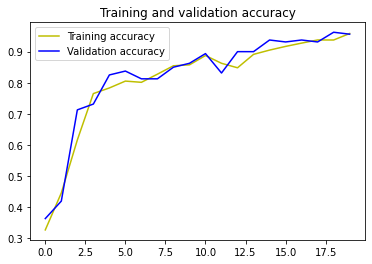

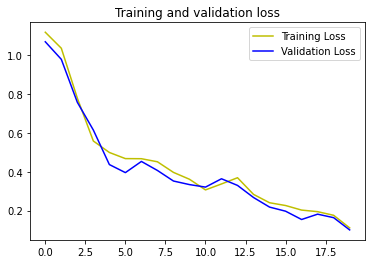

In [11]:
acc = hist.history['accuracy']
loss = hist.history['loss']

valAcc = hist.history['val_accuracy']
valLoss = hist.history['val_loss']

epochRange = range(len(acc))

plt.plot(epochRange, acc, 'y', label='Training accuracy')
plt.plot(epochRange, valAcc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochRange, loss, 'y', label='Training Loss')
plt.plot(epochRange, valLoss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Predicting in Google Colab

In [20]:
# from google.colab import files

# uploads = files.upload()

# for fn in uploads.keys():
#     path = fn
#     img_src = image.load_img(path, target_size=(100, 150))
#     imgplot = plt.imshow(img_src)
#     x = image.img_to_array(img_src)
#     x = np.expand_dims(x, axis=0)

#     images = np.vstack([x])
#     classes = model.predict(images, batch_size=20)

#     print(fn)
#     if classes[0, 0] == 1:
#         print('rock')
#     elif classes[0, 1] == 1:
#         print('paper')
#     elif classes[0, 2] == 1:
#         print('scissors')